# Load the dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/TG_STAID000087.txt", skiprows=20, parse_dates=["    DATE"])

In [3]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,87,337,1948-01-01,-9999,9
1,87,337,1948-01-02,-9999,9
2,87,337,1948-01-03,-9999,9
3,87,337,1948-01-04,-9999,9
4,87,337,1948-01-05,-9999,9
...,...,...,...,...,...
27175,87,927612,2022-05-27,118,0
27176,87,927612,2022-05-28,100,0
27177,87,927612,2022-05-29,109,0
27178,87,927612,2022-05-30,129,0


## Show some certain rows

In [4]:
df[27000:27010]

,STAID,SOUID,DATE,TG,Q_TG
27000,87,927612,2021-12-03,4,0
27001,87,927612,2021-12-04,-21,0
27002,87,927612,2021-12-05,-31,0
27003,87,927612,2021-12-06,-48,0
27004,87,927612,2021-12-07,-17,0
27005,87,927612,2021-12-08,-59,0
27006,87,927612,2021-12-09,-90,0
27007,87,927612,2021-12-10,-134,0
27008,87,927612,2021-12-11,-147,0
27009,87,927612,2021-12-12,-84,0


## Show some certain columns

In [5]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [6]:
df[['    DATE','   TG']]

,DATE,TG
0,1948-01-01,-9999
1,1948-01-02,-9999
2,1948-01-03,-9999
3,1948-01-04,-9999
4,1948-01-05,-9999
...,...,...
27175,2022-05-27,118
27176,2022-05-28,100
27177,2022-05-29,109
27178,2022-05-30,129


## Stats and filtering

In [7]:
df.loc[df['   TG'] != -9999]['   TG'].mean() / 10

5.538881693372312

In [8]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10

30.8

In [9]:
df.loc[df['   TG'] != -9999]['   TG'].min() / 10

-35.0

<AxesSubplot: >

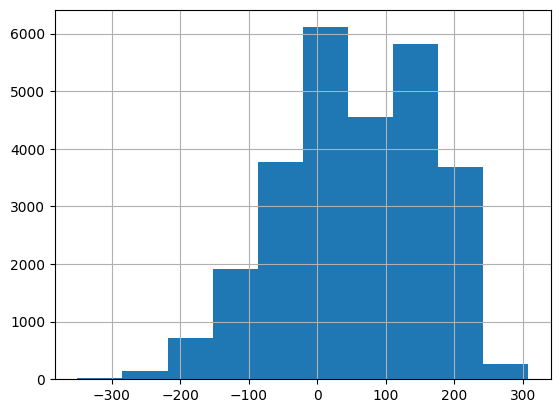

In [10]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

## Get certain cells

In [11]:
df.loc[df['    DATE']=="2002-10-03"]['   TG'].squeeze() / 10

2.3

In [12]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('2010-07-28 00:00:00')

## Calculate a new column out of an existing one

In [13]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG']==-9999,np.nan)

In [14]:
df["TG"] = df['TG0']/10
df

,STAID,SOUID,DATE,TG,Q_TG,TG0,TG
0,87,337,1948-01-01,-9999,9,NaN,NaN
1,87,337,1948-01-02,-9999,9,NaN,NaN
2,87,337,1948-01-03,-9999,9,NaN,NaN
3,87,337,1948-01-04,-9999,9,NaN,NaN
4,87,337,1948-01-05,-9999,9,NaN,NaN
...,...,...,...,...,...,...,...
27175,87,927612,2022-05-27,118,0,118.0,11.8
27176,87,927612,2022-05-28,100,0,100.0,10.0
27177,87,927612,2022-05-29,109,0,109.0,10.9
27178,87,927612,2022-05-30,129,0,129.0,12.9


## Plotting

<AxesSubplot: >

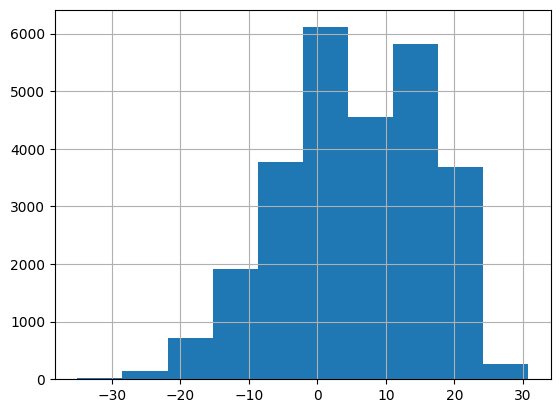

In [15]:
df["TG"].hist()

<AxesSubplot: xlabel='    DATE'>

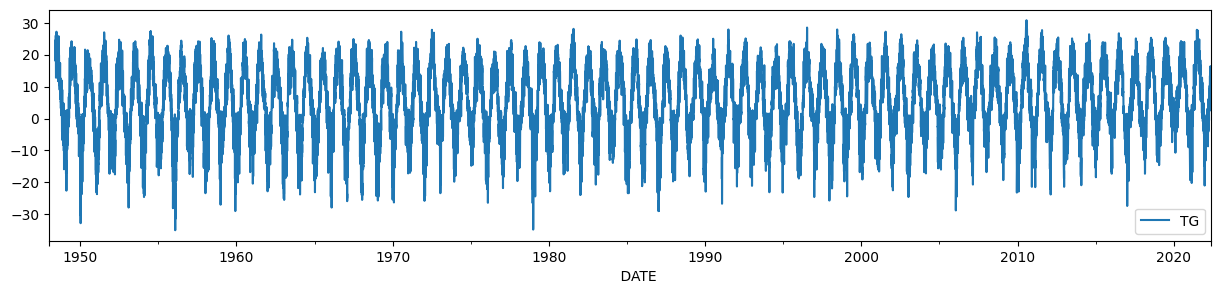

In [16]:
df.plot(x='    DATE', y="TG", figsize=(15, 3))

## Test stations file

In [61]:
dfs = pd.read_csv("data/stations.txt", skiprows=17)
dfs[30:50]

,STAID,STANAME,CN,LAT,LON,HGHT
30,36,PERPIGNAN,FR,+42:44:13,+002:52:22,42
31,37,LYON - ST EXUPERY,FR,+45:43:35,+005:04:40,235
32,39,MARIGNANE,FR,+43:26:16,+005:12:57,9
33,40,BAMBERG,DE,+49:52:31,+010:55:18,240
34,41,BERLIN-DAHLEM,DE,+52:27:50,+013:18:06,51
35,42,BREMEN,DE,+53:02:47,+008:47:57,4
36,43,DRESDEN WAHNSDORF,DE,+51:07:00,+013:40:59,246
37,44,FRANKFURT,DE,+50:02:47,+008:35:54,112
38,45,HALLE,DE,+51:30:52,+011:57:02,93
39,46,HAMBURG BERGEDORF,DE,+53:28:50,+010:14:34,35


In [68]:
data = dfs.loc[dfs["STAID"] == 87]
data
data["STANAME                                 "].item()

'MOSKVA VDNX                             '

In [71]:
dfs.loc[dfs["STAID"] == 87]["STANAME                                 "].item()

'MOSKVA VDNX                             '